importing required liabries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pylab import rcParams
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]  = (20,10)
import seaborn as sns

In [2]:
# reading data
df = pd.read_csv('bengaluru_house_prices.csv')

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [7]:
# droping unwanted feature ans storing in new data frame

df1 =df.drop(['area_type','availability','society','balcony'], axis= 'columns') 

In [8]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
df1.shape

(13320, 5)

In [10]:
# checking null values

df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
# droping all null values because the the null data is too small and store in df2 datafarme

df2 = df1.dropna()

In [12]:
# no null values in the df2 dataframe

df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [13]:
df2.shape

(13246, 5)

In [14]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

##### 1. now if we look in the "size" column we just need the numbers so..
##### 2. we use split function to split through spaces and get the 0 index element and store it into "bhk" column in df2

In [15]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-15-eadc3504d97e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))


In [16]:
# we get the bhk numbers
df2.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [17]:
# here we making the function to convert all the values in "total_sqft" to float 
# and if there is some exception the we get that value in return

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [18]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [19]:
df2[~df2['total_sqft'].apply(is_float)].head(5) # here we calling the function

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [20]:
# if we look in output we see some values in range 
# so we take the mean of that range values

# for those range valueswe make this function which split the values through the '-' .
# then we take the 0 index value and sum with 1 index value and divide with 2 

def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None

In [21]:
df3 = df2.copy() # coping into new dataframe in df3
df3.total_sqft = df3.total_sqft.apply(convert_sqft_to_num) # here we calling function
df3 = df3[df3.total_sqft.notnull()]

In [22]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [23]:
df3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

In [24]:
df1.loc[30]

location        Yelahanka
size                4 BHK
total_sqft    2100 - 2850
bath                    4
price                 186
Name: 30, dtype: object

In [26]:
df4 = df3.copy() # creating new copy of dataframe df4

In [27]:
# making price_per_sqft column in df4 for getting the per sqft price
df4['price_per_sqft'] = df['price'] * 100000 /df4['total_sqft']

In [28]:
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [29]:
df4_stats=df4['price_per_sqft'].describe()

In [30]:
df4_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [31]:
# making csv file of clean data
df4.to_csv("bhp.csv", index=False) 

In [32]:
# removing whitespaces(front and back) in location column through strip function
df4.location = df4.location.apply(lambda x: x.strip())
location_stats = df4['location'].value_counts(ascending = False) # output in desecding order
location_stats

Whitefield                         533
Sarjapur  Road                     392
Electronic City                    304
Kanakpura Road                     264
Thanisandra                        235
                                  ... 
Chuchangatta Colony                  1
singapura paradise                   1
Vijay Nagar                          1
Raja Rajeshwari Nagara               1
Kengeri Satellite Town Stage II      1
Name: location, Length: 1287, dtype: int64

In [33]:
location_stats.values.sum()

13200

In [34]:
len(location_stats[location_stats>10])

240

In [35]:
len(location_stats)

1287

In [36]:
len(location_stats[location_stats<=10])

1047

In [37]:
# looking the location count less than 10 and store it in variable

location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Naganathapura                      10
Ganga Nagar                        10
Kalkere                            10
Dodsworth Layout                   10
Dairy Circle                       10
                                   ..
Chuchangatta Colony                 1
singapura paradise                  1
Vijay Nagar                         1
Raja Rajeshwari Nagara              1
Kengeri Satellite Town Stage II     1
Name: location, Length: 1047, dtype: int64

In [38]:
len(df4.location.unique())

1287

In [39]:
# making the value other in location if the location count is less than 10

df4.location = df4.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df4.location.unique())

241

In [40]:
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [41]:
df5 = df4[df4.total_sqft/df4.bhk<300].head()

In [42]:
df5 = df4[~(df4.total_sqft/df4.bhk<300)]

In [43]:
df5.shape

(12456, 7)

In [52]:
df5.price_per_sqft.describe() 

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [45]:
# df5.describe()

1. **if mean is greater than std then outliers is present**
2.  creating function to remove the outliers on avove logic

In [46]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft <=(m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out
df6 = remove_pps_outliers(df5)
df6.shape

(10242, 7)

In [47]:
df6.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


### plotting graphs

In [48]:
def plot_scatter_plot(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label = '2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker = '+',color = 'green', label = '3 BHK', s=50)
    
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

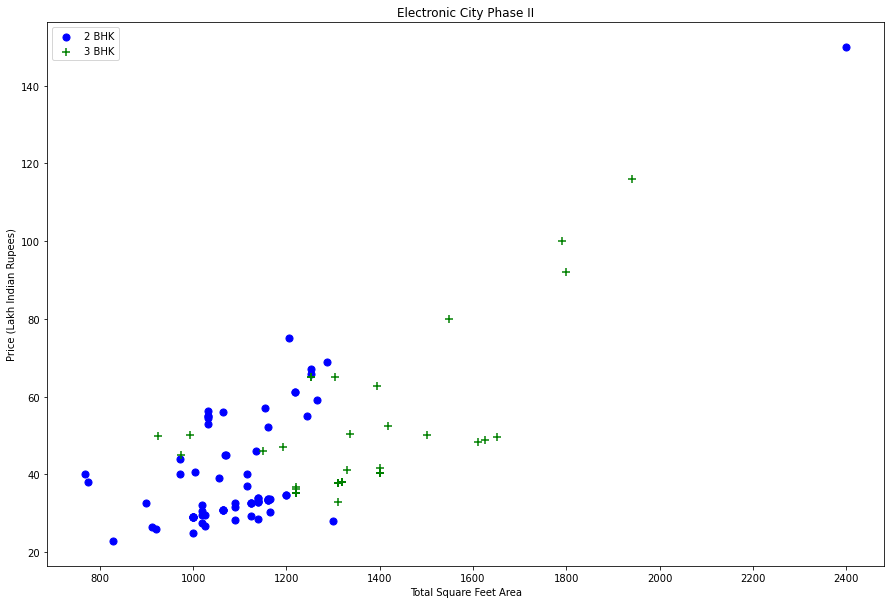

In [49]:
plot_scatter_plot(df5, "Electronic City Phase II")

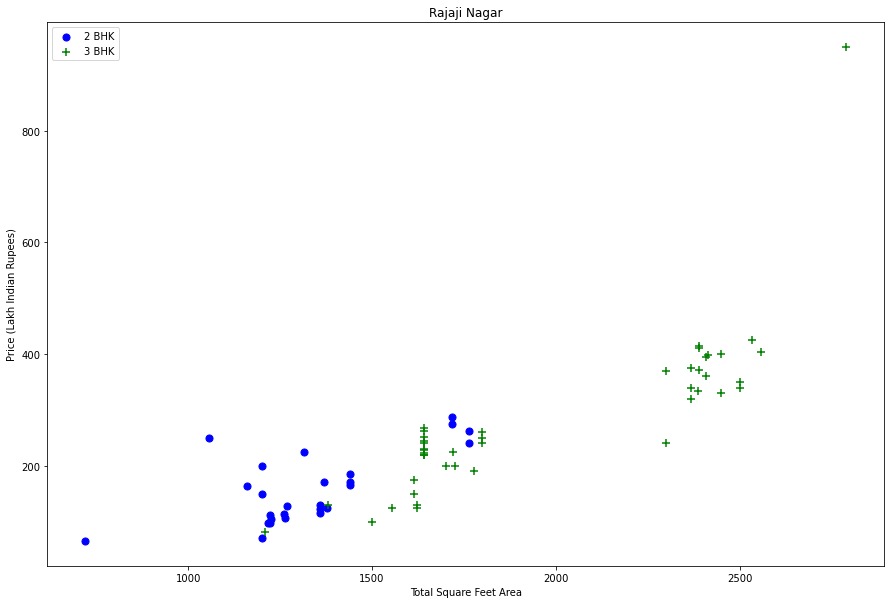

In [50]:
plot_scatter_plot(df5, "Rajaji Nagar")